In [2]:
from osca import pass_at_k
import numpy as np
import json

models = ["Qwen", "Llama"]
temps = ['0.2', '0.5', '0.8', '1.1', '1.4']

with open('bcb_results.json', 'r') as f:
    data = json.load(f)
    
settings = [s['name'] for s in data['settings']]
tot_runs_t = {setting["name"]: setting["runs"] for setting in data["settings"]}
training = data['training_instances']
test = data['testing_instances']

ks = [2,3,5,7,11,17,25,38,57,86,129,194,291]
ks += [4,8,16,32,64,128,256]
ks = sorted(ks)
pure_pass_at_ks = []

for i, setting in enumerate(settings):
    resolved_instances_list = []
    tot_runs = tot_runs_t[setting]
    pass_at_ks = []
    for k in ks:
        if k > tot_runs:
            continue
        tot = 0
        for j, instance_id in enumerate(data["testing_instances"]):
            tot += pass_at_k(tot_runs, data['test'][str(i)][j], k)
        pass_at_ks.append(tot / len(data["testing_instances"]))
    pure_pass_at_ks.append(pass_at_ks)
    print(f'{setting} pass@{57}: {pass_at_ks[8]}')

Qwen_0.2 pass@57: 0.37118148625201913
Qwen_0.5 pass@57: 0.45351367411784893
Qwen_0.8 pass@57: 0.48892524983403035
Qwen_1.1 pass@57: 0.5187960893833878
Qwen_1.4 pass@57: 0.6126753207218812
Llama_0.2 pass@57: 0.41157797566093407
Llama_0.5 pass@57: 0.4703849657384014
Llama_0.8 pass@57: 0.5250305840299482
Llama_1.1 pass@57: 0.5300540260889951
Llama_1.4 pass@57: 0.6436908201837709


In [3]:
pass_at_k_qwen_0_2 = pure_pass_at_ks[settings.index('Qwen_0.2')]
pass_at_k_qwen_1_4 = pure_pass_at_ks[settings.index('Qwen_1.4')]
pass_at_k_llama_1_4 = pure_pass_at_ks[settings.index('Llama_1.4')]

print(f'Qwen 0.2 pass@k: {pass_at_k_qwen_0_2}')
print(f'Qwen 1.4 pass@k: {pass_at_k_qwen_1_4}')
print(f'Llama 1.4 pass@k: {pass_at_k_llama_1_4}')


Qwen 0.2 pass@k: [np.float64(0.30291827459051546), np.float64(0.3151219259517615), np.float64(0.32396068677094914), np.float64(0.3309956606743809), np.float64(0.34186618092844623), np.float64(0.34624929751432765), np.float64(0.35680995585631275), np.float64(0.3692138944061394), np.float64(0.37118148625201913), np.float64(0.3830416807030882), np.float64(0.3897555651172445), np.float64(0.3939465054619747), np.float64(0.4024413185637568), np.float64(0.4045987916164274), np.float64(0.40981519457301074), np.float64(0.41680884328281465), np.float64(0.4169522995570216), np.float64(0.42524393145586104), np.float64(0.4318663335201099), np.float64(0.4351179144155732)]
Qwen 1.4 pass@k: [np.float64(0.37876311351227737), np.float64(0.4318448548451241), np.float64(0.4680301575263904), np.float64(0.4947388827613176), np.float64(0.532156281078879), np.float64(0.5459592749533572), np.float64(0.5764239108980224), np.float64(0.6079835167601672), np.float64(0.6126753207218812), np.float64(0.64001838482252

In [6]:
!python osca.py bcb_results.json --ks 2,3,4,5,7,8,11,16,17,25,32,38,57,64,86,128,129,194,256,291

[{'name': 'Qwen_0.2', 'runs': 300}, {'name': 'Qwen_0.5', 'runs': 300}, {'name': 'Qwen_0.8', 'runs': 300}, {'name': 'Qwen_1.1', 'runs': 300}, {'name': 'Qwen_1.4', 'runs': 300}, {'name': 'Llama_0.2', 'runs': 300}, {'name': 'Llama_0.5', 'runs': 300}, {'name': 'Llama_0.8', 'runs': 300}, {'name': 'Llama_1.1', 'runs': 300}, {'name': 'Llama_1.4', 'runs': 300}]
  0%|                                                    | 0/20 [00:00<?, ?it/s]Test pass rate for 2 samples: 0.39058746438746433
Optimized strategy for 2 samples: [4, 5]

Test pass rate for 3 samples: 0.45285528015194687
Optimized strategy for 3 samples: [9, 4, 5]

Test pass rate for 4 samples: 0.5079499222476304
Optimized strategy for 4 samples: [4, 4, 9, 9]

Test pass rate for 5 samples: 0.5314549318181012
Optimized strategy for 5 samples: [9, 9, 4, 4, 1]

Test pass rate for 7 samples: 0.5845657805937592
Optimized strategy for 7 samples: [9, 9, 9, 4, 1, 4, 4]

Test pass rate for 8 samples: 0.605631561531107
Optimized strategy for 8 s

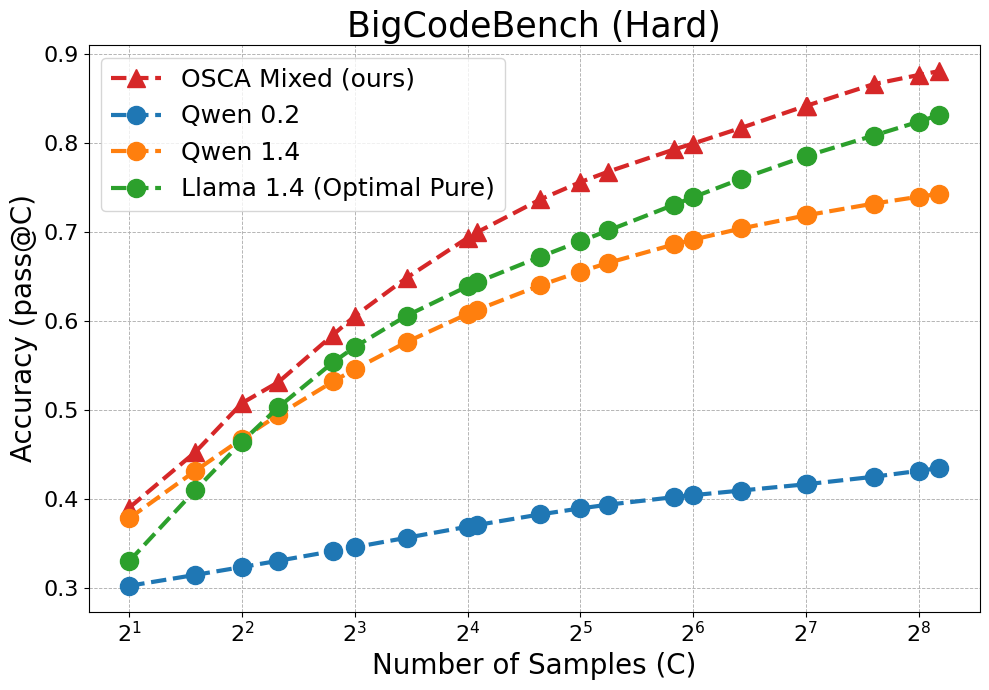

In [11]:
# OSCA results should be copied from the output of the above OSCA command.
osca_results = [np.float64(0.39058746438746433), np.float64(0.45285528015194687), np.float64(0.5079499222476304), np.float64(0.5314549318181012), np.float64(0.5845657805937592), np.float64(0.605631561531107), np.float64(0.6484911405379139), np.float64(0.6933174579660202), np.float64(0.6998279744536545), np.float64(0.7364168658087256), np.float64(0.75591251470423), np.float64(0.7676388096121429), np.float64(0.7926286385645627), np.float64(0.799158007999798), np.float64(0.8167495161846541), np.float64(0.8415425452497683), np.float64(0.8418204273991133), np.float64(0.86581681356759), np.float64(0.8760998618523891), np.float64(0.8804975900180597)]

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.plot(ks, osca_results, linestyle='--', marker='^', label='OSCA Mixed (ours)', markersize=13, linewidth=3, color='tab:red')
plt.plot(ks, pass_at_k_qwen_0_2, linestyle='--', marker='o', label='Qwen 0.2', markersize=13, linewidth=3, color='tab:blue')
plt.plot(ks, pass_at_k_qwen_1_4, linestyle='--', marker='o', label='Qwen 1.4', markersize=13, linewidth=3, color='tab:orange')
plt.plot(ks, pass_at_k_llama_1_4, linestyle='--', marker='o', label='Llama 1.4 (Optimal Pure)', markersize=13, linewidth=3, color='tab:green')

handles, labels = plt.gca().get_legend_handles_labels()
legend_order = {
    'OSCA Mixed (ours)': 1,
    'Qwen 0.2': 2,
    'Qwen 1.4': 3,
    'Llama 1.4 (Optimal Pure)': 4,
}

# Sort the labels and handles
sorted_labels_handles = sorted(zip(labels, handles), key=lambda x: legend_order[x[0]])
labels, handles = zip(*sorted_labels_handles)

plt.legend(handles, labels, fontsize=18)

plt.title('BigCodeBench (Hard)', fontsize=25)

plt.xlabel('Number of Samples (C)', fontsize=20)
plt.ylabel('Accuracy (pass@C)', fontsize=20)
plt.legend(fontsize=18)
plt.yticks(fontsize=16)
plt.xticks([2, 4, 8, 16, 32, 64, 128, 256], ['$2^1$', '$2^2$', '$2^3$', '$2^4$', '$2^5$', '$2^6$', '$2^7$', '$2^8$'], fontsize=16)
plt.xscale('log', base=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.65)

plt.tight_layout()
plt.savefig('bcb.png')
plt.show()